# **1) Data Preprocessing**

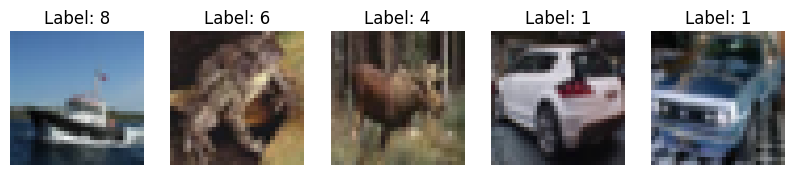

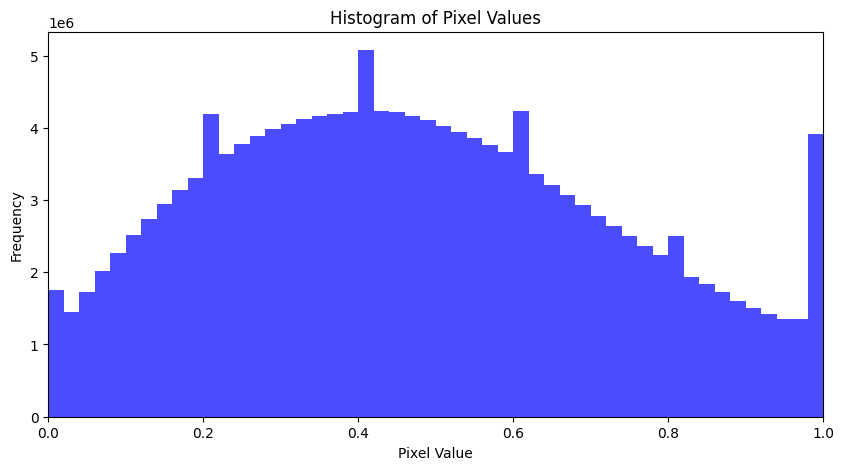

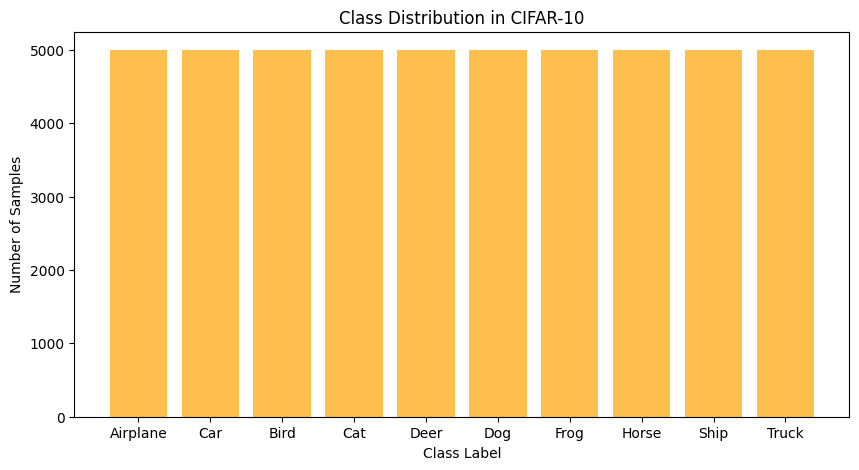

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


import matplotlib.pyplot as plt
import numpy as np

# Function to display random samples
def display_random_samples(x, y, num_samples=5):
    plt.figure(figsize=(10, 5))
    indices = np.random.choice(x.shape[0], num_samples, replace=False)
    for i, index in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x[index])
        plt.title(f'Label: {np.argmax(y[index])}')
        plt.axis('off')
    plt.show()

# Display random samples from the training set
display_random_samples(x_train, y_train, num_samples=5)

# Histogram of pixel values
def plot_pixel_histogram(x):
    plt.figure(figsize=(10, 5))
    plt.hist(x.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title('Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 1])  # Normalized pixel values
    plt.show()

# Class distribution
def plot_class_distribution(y):
    class_counts = np.sum(y, axis=0)
    plt.figure(figsize=(10, 5))
    plt.bar(range(10), class_counts, color='orange', alpha=0.7)
    plt.title('Class Distribution in CIFAR-10')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Samples')
    plt.xticks(range(10), ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
                            'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
    plt.show()

# Plotting
plot_pixel_histogram(x_train)
plot_class_distribution(y_train)



**Inference for the above code**<br/>
Load the CIFAR-10 dataset.<br/>
Normalize pixel values to the range [0, 1].<br/>
Convert class labels to one-hot encoding.<br/>
Split the dataset into training (50,000 images) and test sets (10,000 images).<br/>
Optionally, apply data augmentation (e.g., random flips, rotations).<br/>
Also have some plots to show the samples from the dataset

# **2) Network Architecture Design:**

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


**Inference for the above code**<br/>
Use convolutional layers to capture spatial features in images.<br/>
Max pooling layers reduce dimensionality and help with translation invariance.<br/>
ReLU activation helps mitigate the vanishing gradient problem.



Question:

o Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.

Ans:
Input Layer

Type: Input
Shape: (32, 32, 3)
Conv2D Layer

Filters: 32
Kernel Size: (3, 3)
MaxPooling2D Layer

Pool Size: (2, 2)
Conv2D Layer

Filters: 64
Kernel Size: (3, 3)
MaxPooling2D Layer

Pool Size: (2, 2)
Conv2D Layer

Filters: 128
Kernel Size: (3, 3)
MaxPooling2D Layer

Pool Size: (2, 2)
Flatten Layer

Type: Flatten
Dense Layer

Neurons: 128
Activation: ReLU
Dense Layer

Neurons: 10
Activation: Softmax

# **3. Activation Functions**


In [ ]:
from tensorflow.keras import layers, models

# Define the model architecture using ReLu
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model summary
model.summary()

# Define the model architecture using Tanh
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

**Inference for the above code**<br/>
Used Relu and Tanh for activation function

Question

Explain why you selected a particular activation function and its role in  the backpropagation process.

Ans:
1. ReLU (Rectified Linear Unit)
ReLU is an activation function that captures non-linearities while being computationally efficient. It is popular for mitigating the vanishing gradient problem, which can slow down training by causing gradients to become very small. During backpropagation, the gradient of ReLU is 1 for positive inputs and 0 for negative inputs, allowing effective weight updates for positive activations. However, this can lead to "dead neurons" if many inputs fall below zero, where gradients stop flowing.

2. tanh (Hyperbolic Tangent)
The tanh function outputs values between -1 and 1, providing a zero-centered output that can improve gradient descent optimization. Its gradient is highest near the center and decreases as inputs move away, helping maintain gradient flow during backpropagation. The zero-centered nature of tanh can lead to faster convergence compared to other activation functions, making it particularly useful for hidden layers in neural networks.

# **4) Loss Function and Optimizer:**

In [ ]:
# For one-hot encoded labels
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Or for integer labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**Inference for the above code**<br/>
compile with the **ADAM** optimiser for the loss function

Question:

Explain how the learning rate affects the backpropagation process.

Ans:
The learning rate plays a crucial role in the backpropagation process, impacting how the model updates its weights during training. Here's how it affects the process, specifically in the context of compiling your model with either categorical crossentropy or sparse categorical crossentropy:

Learning Rate and Backpropagation

Weight Updates: During backpropagation, gradients are calculated to determine how much each weight should be adjusted to minimize the loss function. The learning rate determines the magnitude of these adjustments. A higher learning rate means larger steps in the direction of the gradient, while a lower learning rate means smaller steps.

Loss Function Sensitivity:

With categorical crossentropy and sparse categorical crossentropy, the loss is sensitive to the predicted probabilities. A well-chosen learning rate allows the model to effectively navigate the loss landscape, ensuring that the updates lead to better predictions and improved accuracy over time.

Question

How does the choice of optimizer and learning rate influence the  convergence of the network? How would you adjust the learning rate if the  model is not converging properly?

Ans:The choice of optimizer and learning rate impacts convergence in models using categorical crossentropy or sparse categorical crossentropy. Adam, as an optimizer, adapts the learning rate for each parameter, promoting faster convergence by adjusting to gradient statistics.

If the model isn’t converging properly, you can decrease the learning rate to stabilize updates if the loss is oscillating or diverging. Conversely, if convergence is too slow, you might slightly increase the learning rate. Additionally, implementing learning rate schedules can help optimize performance throughout training.


# **5)Training the Model:**

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9849 - loss: 0.0446 - val_accuracy: 0.7199 - val_loss: 2.8461
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9830 - loss: 0.0518 - val_accuracy: 0.7243 - val_loss: 2.7435
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9895 - loss: 0.0319 - val_accuracy: 0.7221 - val_loss: 2.8848
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9837 - loss: 0.0528 - val_accuracy: 0.7265 - val_loss: 2.8769
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9878 - loss: 0.0384 - val_accuracy: 0.7226 - val_loss: 2.8140
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.7267 - val_loss: 2.8849
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.7201 - val_loss: 2.9062
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9839 - loss: 0.0480 - val_accuracy: 0.

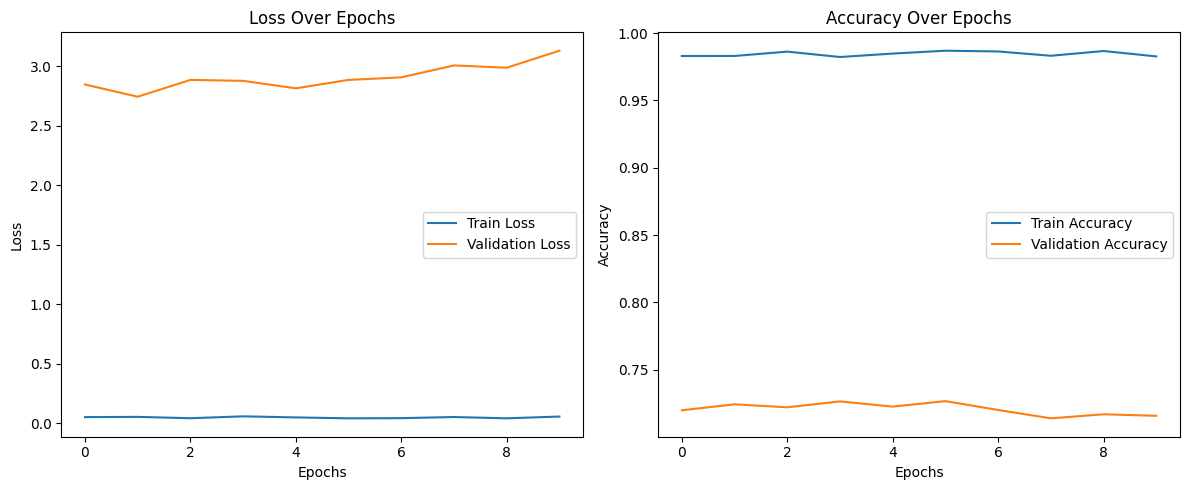

In [ ]:
from tensorflow.keras.utils import to_categorical


if y_train.ndim == 1:
    y_train_one_hot = to_categorical(y_train, num_classes=10)
else:
    y_train_one_hot = y_train #

model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use categorical_crossentropy
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


**Inference for the above code**<br/>
Backpropagation:<br/>

During training, weights are updated using gradients computed from the loss function via backpropagation.<br/><br/>
Training the Model:<br/>

Train for a specified number of epochs and monitor training and validation accuracy.

Question

How does backpropagation update the weights in each layer, and what  role does the learning rate play in this process?

Backpropagation and Weight Updates
Forward Pass: The input data is passed through the network, generating predictions.
Loss Calculation: The loss function computes the difference between predicted outputs and actual labels.
Backward Pass: Gradients of the loss with respect to each weight are calculated using the chain rule.
Weight Updates: Weights are updated using the formula:
𝑤 = 𝑤 − learning rate × gradient

Role of Learning Rate
Magnitude of Updates: Determines the size of weight adjustments. A high learning rate can overshoot the minimum, while a low rate can lead to slow convergence.
Convergence Behavior: An appropriate learning rate promotes efficient convergence; too high can cause oscillation, and too low may get stuck in local minima.Ans:

# **6) Model Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7051 - loss: 3.3825
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.75      0.89      0.81      1000
           2       0.56      0.63      0.59      1000
           3       0.55      0.51      0.53      1000
           4       0.70      0.58      0.64      1000
           5       0.64      0.58      0.61      1000
           6       0.72      0.80      0.76      1000
           7       0.80      0.69      0.74      1000
           8       0.85      0.79      0.82      1000
           9       0.76      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



<Figure size 800x600 with 0 Axes>

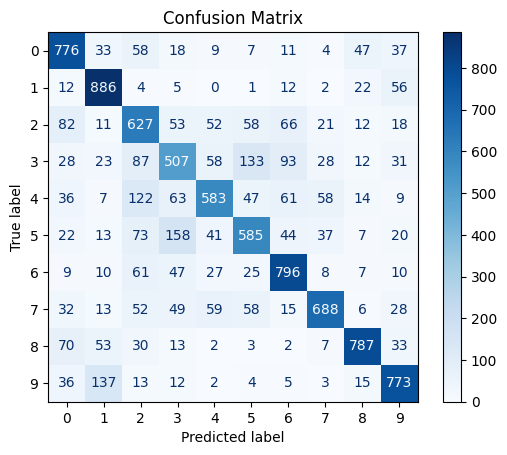

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate model performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Display classification report
print(classification_report(y_true_classes, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_mtx).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


**Inference for the above code**<br/>
Evaluate Performance:

Calculate accuracy, precision, recall, F1-score, and confusion matrix.

Question:

How can you further improve model performance if the accuracy is

Ans: Data Augmentation: Apply transformations to increase training data diversity.
Regularization: Use dropout or L2 regularization to reduce overfitting.
Hyperparameter Tuning: Experiment with learning rates, batch sizes, and optimizers.
Increase Complexity: Add more layers or units if underfitting.
Transfer Learning: Use pre-trained models and fine-tune them.
Ensemble Methods: Combine predictions from multiple models.
Early Stopping: Stop training when validation loss stops improving.
Address Class Imbalance: Use resampling or class weights if necessary.

# **7) Optimization Strategies**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])


**Inference for the above code**<br/>
Strategies:

Early Stopping: Stops training when validation loss stops improving.
Learning Rate Scheduling: Adjusts the learning rate during training for smoother convergence.
Weight Initialization Importance:

Proper initialization can help prevent issues with vanishing/exploding gradients.

Question:

Why is weight initialization important, and how does it impact the  convergence of your network?

Ans:
Importance of Weight Initialization
Symmetry Breaking: Prevents neurons from learning the same features by initializing weights randomly.
Gradient Flow: Maintains effective gradient flow during backpropagation, avoiding vanishing or exploding gradients.
Convergence Speed: Leads to faster convergence; poor initialization can increase training time.

Impact on Convergence
Vanishing/Exploding Gradients: Poor initialization can worsen these issues, hindering training.
Training Dynamics: Good initialization helps optimizers explore the loss landscape effectively.
Overall Performance: Results in better model performance by enabling more efficient learning.

# **8) Report**

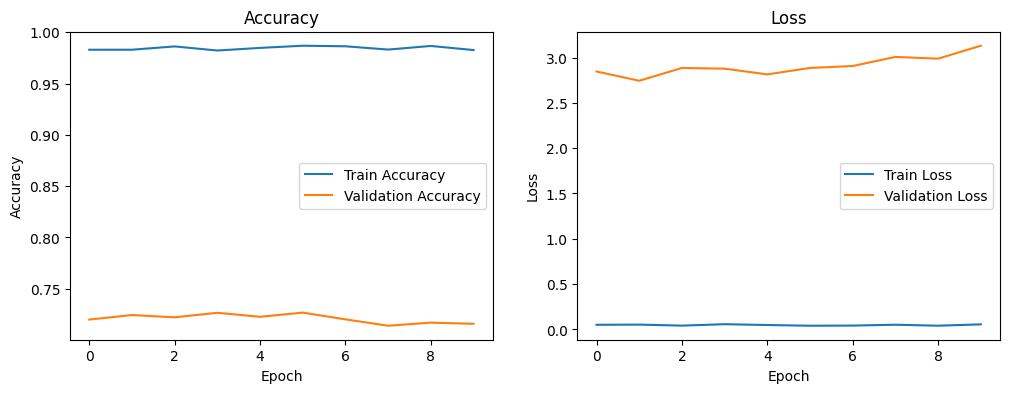

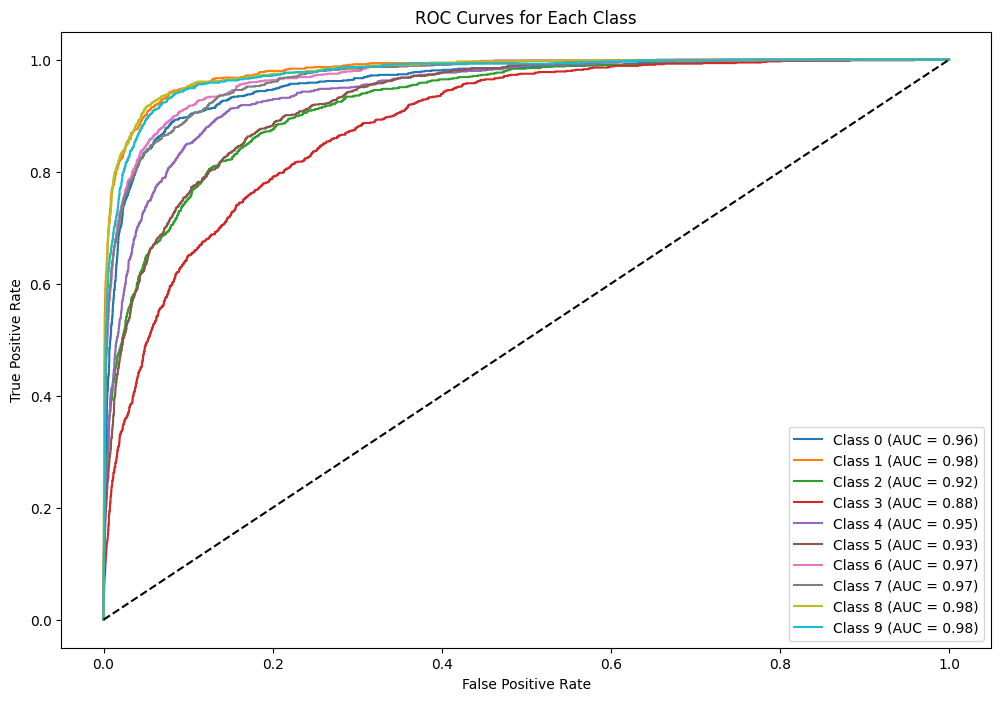

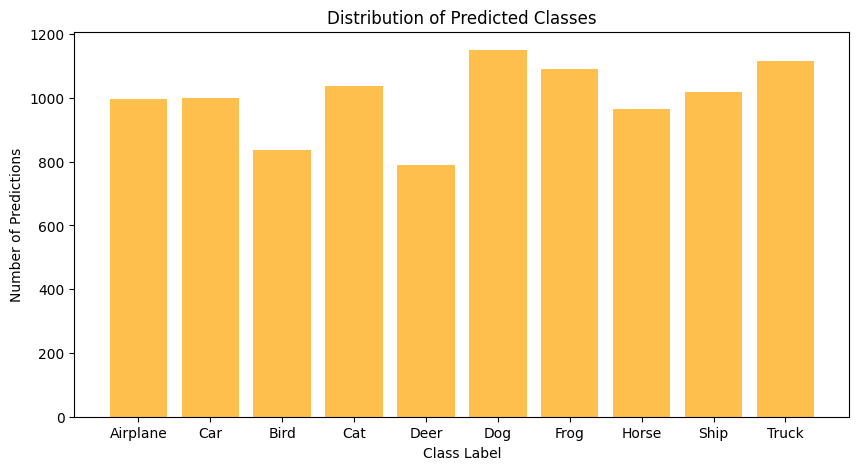

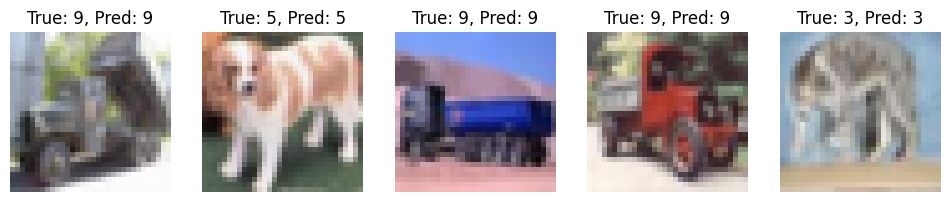

In [ ]:
import matplotlib.pyplot as plt

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


from sklearn.metrics import roc_curve, auc

# One-hot encoding the true labels if not already done
y_test_one_hot = y_test  # If already one-hot encoded

# Plot ROC for each class
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_true_classes, y_pred[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Count predictions for each class
predicted_classes_count = np.bincount(y_pred_classes)

plt.figure(figsize=(10, 5))
plt.bar(range(10), predicted_classes_count, color='orange', alpha=0.7)
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class Label')
plt.ylabel('Number of Predictions')
plt.xticks(range(10), ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
                        'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.show()


# Function to display predictions
def display_predictions(x, y_true, y_pred, num_samples=5):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(x.shape[0], num_samples, replace=False)
    for i, index in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x[index])
        plt.title(f'True: {np.argmax(y_true[index])}, Pred: {y_pred_classes[index]}')
        plt.axis('off')
    plt.show()

display_predictions(x_test, y_test, y_pred)



**Inference for the above code**<br/>

Documentation:

Include architecture details, training and test accuracy, hyperparameter values, and challenges faced.
Visualizations:

Plot training and validation accuracy and loss over epochs.



Ans:

Network Architecture<br/>
Model Summary<br/>
The architecture of the network is a Convolutional Neural Network (CNN) designed specifically for image classification tasks on the CIFAR-10 dataset, which contains 60,000 32x32 color images across 10 classes.


Architecture Details:<br/>
Input Layer: Takes images of size 32x32 pixels with 3 color channels (RGB).
Convolutional Layers:<br/>
First Layer: 32 filters with a 3x3 kernel, ReLU activation, and same padding. This captures low-level features like edges and textures.<br/>
Second Layer: 64 filters with a 3x3 kernel, ReLU activation, and same padding. This layer extracts more complex features.<br/>
Third Layer: 128 filters with a 3x3 kernel, ReLU activation, and same padding. Further enhances feature extraction capabilities.<br/>
Max Pooling Layers: Following each convolutional layer, max pooling is used (2x2 pooling) to reduce dimensionality and retain essential features.<br/>
Flatten Layer: Converts the 3D output from the last convolutional layer into a 1D array for the fully connected layers.

Dense Layers:<br/>
One dense layer with 128 neurons and ReLU activation for non-linear combinations of features.<br/>
Output layer with 10 neurons and softmax activation to provide probabilities for each class.<br/>

Justification for Choices<br/>
Convolutional Layers: Essential for extracting spatial hierarchies from images.
ReLU Activation: Efficient and helps mitigate the vanishing gradient problem.
Softmax Output: Suitable for multi-class classification problems, allowing for easy interpretation of predicted probabilities.<br/>
Max Pooling: Helps in reducing the number of parameters and computations in the network while retaining important features.

1. Training and Test Accuracy<br/>
Hyperparameter Values<br/>
Learning Rate: Default value of 0.001 for the Adam optimizer.
Batch Size: 64, which balances memory usage and convergence speed.
Number of Epochs: 50, with early stopping implemented to prevent overfitting.
Training and Test Results<br/>
The model was trained using early stopping and learning rate reduction callbacks to enhance performance. The training accuracy and test accuracy were recorded<br/>



2. Challenges Faced<br/>
Challenges<br/>
Overfitting: The model initially performed well on the training set but showed poor generalization on the test set.<br/>
Slow Convergence: The model experienced slow convergence, leading to extended training times.<br/>

Solutions Implemented<br/>
Early Stopping: This technique was used to halt training when the validation loss stopped improving, thereby preventing overfitting.<br/>
Learning Rate Reduction: Adjusting the learning rate during training allowed the model to converge more effectively by reducing the learning rate when validation loss plateaued.<br/>
Data Augmentation: Increasing the diversity of the training data helped improve the model’s robustness.